In [1]:
##The dataset is loaded to your GDrive so need to be mounted
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Satellite Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from utils import *

from models.basic_unet import UNet
from models.siam_nested_unet import Siam_NestedUNet_Conc

from datasets.dataset import ChangeDetectionDataset
from datasets.diff_dataset import ChangeDetectionDiffDataset

## Read Data


In [3]:
model_name = 'siamese_full_tr88.pt'
testset_path = './testset/'
predicted_images_dir = './testset/Predictions'

In [4]:
after_images = read_data(testset_path, 'after')
before_images = read_data(testset_path,'before')

Time taken to read  after  images: 8.12 seconds
Time taken to read  before  images: 6.18 seconds


In [5]:
len(after_images)
len(before_images)

608

In [6]:
assert len(after_images) == len(before_images)

In [7]:
# diff_images = preprocess(before_images, after_images, save_dir=testset_path)

In [8]:
print(len(after_images))

608


In [9]:
batch_size = 16

In [19]:
# Define transformations
transform_rgb = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Assuming you have instantiated your dataset like this
# test_dataset = ChangeDetectionDiffDataset(diff_images, diff_images, transform_rgb)
test_dataset = ChangeDetectionDataset(before_images, after_images, before_images, transform_rgb)


# Define data loaders for train and validation sets
test_loader = DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle = False)

In [20]:
# Create an instance of the model
threshold = 0.3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# must be changed for each model
# model = UNet(n_channels = 3, n_classes = 1).to(device)
model = Siam_NestedUNet_Conc(in_ch=3, out_ch=1).to(device)
criterion = nn.BCEWithLogitsLoss()

print(device)

cuda


In [21]:
# Load the latest saved model
model = load_model(model, save_dir="saved_models", model_name=model_name, device=device)

In [22]:
predicted_masks_list = predict(model, test_loader, device, threshold)
# predicted_masks_list = predict_diff(model, test_loader, device, threshold)

100%|██████████| 38/38 [00:18<00:00,  2.04it/s]


In [23]:
save_predictions(predicted_masks_list)

Saving predictions
Saving Completed


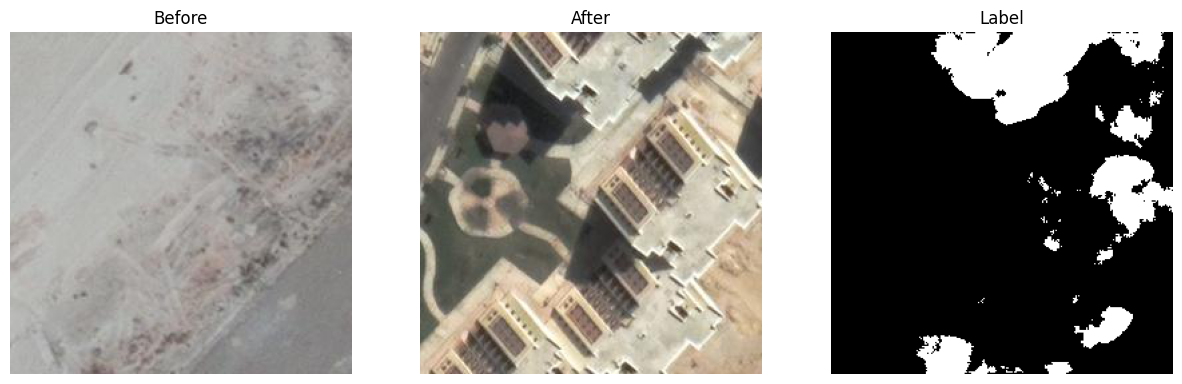

In [36]:
index = 554
display_images([before_images[index], after_images[index]], predicted_masks_list[index])